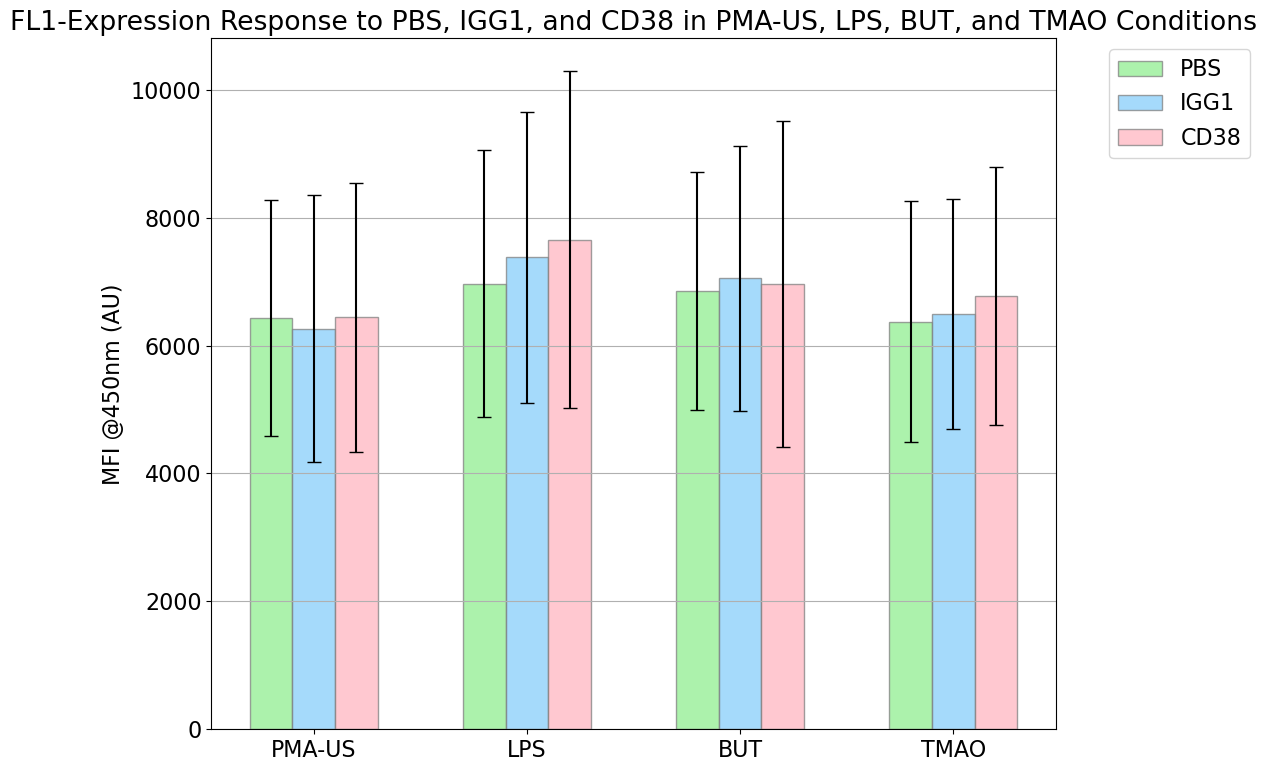

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Set global font size
plt.rcParams.update({'font.size': 16})

# Data for each group
data = {
    "PMA-US": {
        "PBS": np.array([3835.0, 7920.1, 7542.8]),
        "IGG1": np.array([3312.0, 7894.3, 7582.8]),
        "CD38": np.array([3480.0, 8101.7, 7749.9]),
    },
    "LPS": {
        "PBS": np.array([4026.0, 8670.4, 8204.4]),
        "IGG1": np.array([4170.0, 9074.8, 8889.6]),
        "CD38": np.array([3939.0, 9674.5, 9356.8]),
    },
    "BUT": {
        "PBS": np.array([4224.0, 8174.4, 8165.7]),
        "IGG1": np.array([4124.0, 8535.9, 8503.3]),
        "CD38": np.array([3374.0, 9081.5, 8440.4]),
    },
    "TMAO": {
        "PBS": np.array([3709.0, 7874.1, 7533.6]),
        "IGG1": np.array([3958.0, 7789.0, 7730.9]),
        "CD38": np.array([3938.0, 8424.2, 7977.4]),
    },
}

# Calculate means and standard deviations for each group
means = {k: {kk: vv.mean() for kk, vv in v.items()} for k, v in data.items()}
std_devs = {k: {kk: vv.std() for kk, vv in v.items()} for k, v in data.items()}

# Colors
colors = {'PBS': 'lightgreen', 'IGG1': 'lightskyblue', 'CD38': 'lightpink'}

# Create subplots with larger size
fig, ax = plt.subplots(figsize=(12, 8))

# Create bars with error bars and thicker line
barWidth = 0.2
r = np.arange(len(means))

legend_handles = []
for idx, (condition, treatments) in enumerate(means.items()):
    for jdx, (treatment, mean) in enumerate(treatments.items()):
        bar = ax.bar(r[idx]+jdx*barWidth, mean, yerr=std_devs[condition][treatment], color=colors[treatment], width=barWidth, edgecolor='grey', alpha=0.75, capsize=5)
        if idx == 0:
            legend_handles.append(bar)

# Set labels and title
ax.set_ylabel('MFI @450nm (AU)')
ax.set_xticks(r + barWidth)
ax.set_xticklabels(means.keys())
ax.set_title('FL1-Expression Response to PBS, IGG1, and CD38 in PMA-US, LPS, BUT, and TMAO Conditions')

# Show grid
ax.yaxis.grid(True)

# Move legend outside of plot area and only show treatments
ax.legend(legend_handles, colors.keys(), bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.tight_layout()
plt.show()
